In [1]:
#link data: https://archive.ics.uci.edu/dataset/320/student+performance

In [2]:
#import library necesary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
#load the data from the CSV file into Pandas DF
data = pd.read_csv(r"student-por.csv", sep=";") #the argument sep mean method of column separation in file csv

In [4]:
#view our Dataframe
data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
#When observing our data it is necessary to keep only the columns that we want to use, in this case we will only keep the columns Sex, Age, Studytime, Absences, G1, G2 and G3
data = data[["age", "sex", "studytime", "absences", "G1", "G2", "G3"]]
#view our new Dataframe
data

,age,sex,studytime,absences,G1,G2,G3
0,18,F,2,4,0,11,11
1,17,F,2,2,9,11,11
2,15,F,2,6,12,13,12
3,15,F,3,0,14,14,14
4,16,F,2,0,11,13,13
...,...,...,...,...,...,...,...
1039,20,M,2,11,9,9,9
1040,17,M,1,3,14,16,16
1041,21,M,1,3,10,8,7
1042,18,M,1,0,11,12,10


In [6]:
#is important specific that columns G1, G2 and G3 are grades that the students get, mediant linear regression model i will predict G3 grades
#convert sex F to 0 and M to 1
data["sex"] =  data["sex"].map({"F": 0,"M": 1})
#view changes in our data
data

,age,sex,studytime,absences,G1,G2,G3
0,18,0,2,4,0,11,11
1,17,0,2,2,9,11,11
2,15,0,2,6,12,13,12
3,15,0,3,0,14,14,14
4,16,0,2,0,11,13,13
...,...,...,...,...,...,...,...
1039,20,1,2,11,9,9,9
1040,17,1,1,3,14,16,16
1041,21,1,1,3,10,8,7
1042,18,1,1,0,11,12,10


In [7]:
#define the column to predict
prediction = "G3"

In [8]:
#preparing data with numpy for charge in sklearn
X = np.array(data.drop(prediction, axis=1))
y = np.array(data[prediction])

In [9]:
#normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
#select train and test datan for our linear regression model
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.26, random_state=38)

In [11]:
#define the model
model = LinearRegression()
#train data
model.fit(x_test, y_test)

LinearRegression()

In [12]:
#view accuracy of our prediction model with test data
accuracy = model.score(x_test, y_test)
#view the accuracy
print(f"this model have a {accuracy*100}% of prediction")

this model have a 85.08102384490253% of prediction


In [13]:
#define variabl to predict
x_new =  np.array([[1, 2, 3, 40, 15, 16]])
#predict x_new
y_new = model.predict(x_new)

In [14]:
print(f"the predict of x_new is: {y_new}")

the predict of x_new is: [68.90614015]


In [15]:
#calculate Mean Square Error in this model
y_preditc = model.predict(x_test)
#import MSE
from sklearn.metrics import mean_squared_error
#define MSE
mse =  mean_squared_error(y_test, y_preditc)
#view MSE
print(f"the mean square error is: {mse}")



the mean square error is: 1.9728495789760003


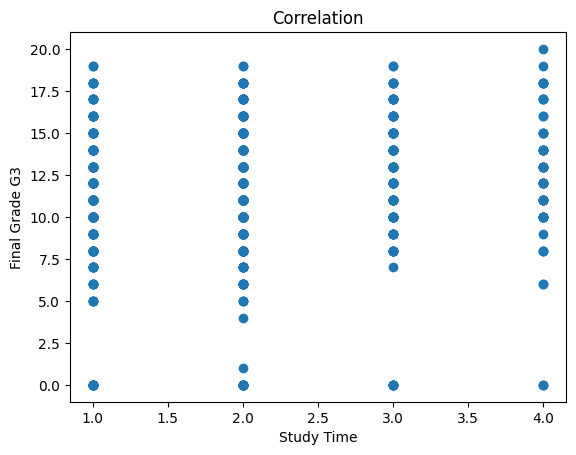

In [16]:
#visualizing correlation
plt.scatter(data["studytime"], data["G3"])
plt.title("Correlation")
plt.xlabel("Study Time")
plt.ylabel("Final Grade G3")
plt.show()

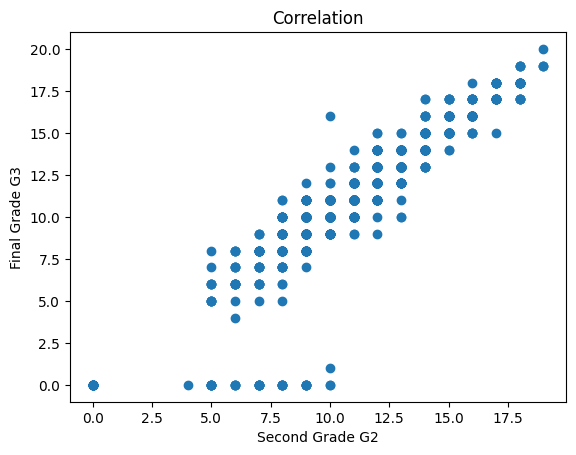

In [17]:
plt.scatter(data["G2"], data["G3"])
plt.title("Correlation")
plt.xlabel("Second Grade G2")
plt.ylabel("Final Grade G3")
plt.show()

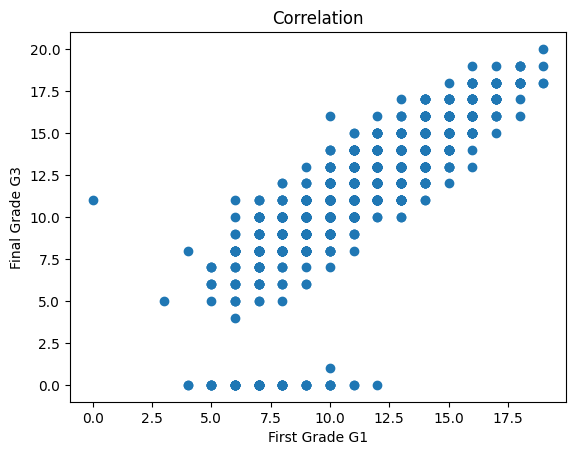

In [18]:
plt.scatter(data["G1"], data["G3"])
plt.title("Correlation")
plt.xlabel("First Grade G1")
plt.ylabel("Final Grade G3")
plt.show()